In [12]:
import spacy

nlp = spacy.load('ja_ginza')
doc = nlp('これはテストです。5月のブログです。')

for sent in doc.sents:
    print(sent)
    for token in sent:
        info = [
            token.i,         # トークン番号
            token.orth_,     # テキスト
            token.lemma_,    # 基本形
            token.pos_,      # 品詞
            token.tag_,      # 品詞詳細
        ]
        print(info)

これはテストです。
[0, 'これ', '此れ', 'PRON', '代名詞']
[1, 'は', 'は', 'ADP', '助詞-係助詞']
[2, 'テスト', 'テスト', 'NOUN', '名詞-普通名詞-サ変可能']
[3, 'です', 'です', 'AUX', '助動詞']
[4, '。', '。', 'PUNCT', '補助記号-句点']
5月のブログです。
[5, '5', '5', 'NUM', '名詞-数詞']
[6, '月', '月', 'NOUN', '名詞-普通名詞-助数詞可能']
[7, 'の', 'の', 'ADP', '助詞-格助詞']
[8, 'ブログ', 'ブログ', 'NOUN', '名詞-普通名詞-一般']
[9, 'です', 'です', 'AUX', '助動詞']
[10, '。', '。', 'PUNCT', '補助記号-句点']


In [2]:
import spacy

nlp = spacy.load('ja_ginza')

with open('bocchan.txt', 'r',encoding="utf-8", errors="ignore") as f1, open('bocchan2.txt', 'w', encoding="utf-8", errors="ignore") as f2:
    for line in f1:
        for sent in nlp(line).sents:
            for token in sent:
                f2.write(f'{token.i}\t{token.orth_}\t{token.lemma_}\t'
                         f'{token.pos_}\t{token.tag_}\n')
            f2.write('EOS\n')

In [14]:
def sequence_gen():
    ''' 情報を一文ずつ取得 '''
    with open('bocchan2.txt', encoding='utf-8') as f:
        sequence = []
        for line in f:
            if line == 'EOS\n':
                yield sequence
                sequence = []
                continue
            word_info = line.strip().split("\t")
            if len(word_info) ==5:
                pos = word_info[3].split(',')
                pos2 = word_info[4].split(',')
                sequence.append({'surface': word_info[1],
                                 'base': word_info[2],
                                 'pos': pos[0],
                                 'pos2': pos2[0]
                                })

for seq in sequence_gen():
    print(seq, "\n")


[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '親', 'base': '親', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '譲り', 'base': '譲り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '無鉄砲', 'base': '無鉄砲', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '小供', 'base': '子供', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '損', 'base': '損', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可

[{'surface': '小使', 'base': '小使', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '負ぶさっ', 'base': '負ぶさる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '帰っ', 'base': '帰る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おやじ', 'base': '親父', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大きな', 'base': '大きな', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '眼', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surfac

[{'surface': 'そん', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '指', 'base': '指', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '切っ', 'base': '切る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みろ', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '注文', 'base': '注文', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base':

[{'surface': '実', 'base': '実', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '熟する', 'base': '熟する', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '時分', 'base': '時分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '起き抜け', 'base': '起き抜け', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '背戸', 'base': '背戸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '落ち', 'base': '落ちる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface

[{'surface': '向う', 'base': '向こう', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': 'つ', 'base': 'つ', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '年上', 'base': '年上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '弱虫', 'base': '弱虫', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '力', 'base': '力', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '強い', 'base': '強い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface

[{'surface': '痛かっ', 'base': '痛い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '勘太郎', 'base': '勘太郎', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '垣根', 'base': '垣根', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '押しつけ', 'base': '押し付ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おい', 'base': 'おく', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '足搦', 'base': '足搦み', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'かけ', 'base': '掛ける', 'pos': 'VERB', 'pos2': '動詞-非自立可能

[{'surface': '大工', 'base': '大工', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '兼', 'base': '兼', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '公', 'base': '公', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '肴屋', 'base': '魚屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '角', 'base': '角', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つれ', 'base': 'つれる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '茂作', 'base': '茂作', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '人参', 'base': '人参', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'},

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時分', 'base': '時分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どんな', 'base': 'どんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '仕掛', 'base': '仕掛け', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ぬ', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '石', 'base': '石', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '棒ちぎれ', 'base': '棒ちぎり', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ぎゅうぎゅう', 'base': 'ぎゅうぎゅう', 'pos': 'ADV', 'pos2': '副詞'}, {'surfa

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見る', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '度', 'base': '度', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'こいつ', 'base': '此奴', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どうせ', 'base': 'どうせ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '碌な', 'base': '碌な', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なら', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、

[{'surface': '母', 'base': '母', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大層', 'base': '大層', 'pos': 'ADJ', 'pos2': '副詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '怒っ', 'base': '怒る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'お前', 'base': '御前', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '見', 'base': '

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '母', 'base': '母', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '死ん', 'base': '死ぬ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おやじ', 'base': '親父', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '暮し', '

[{'surface': 'ある', 'base': '或る', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '｜', 'base': '｜', 'pos': 'NOUN', 'pos2': '補助記号-一般'}, {'surface': '将棋', 'base': '将棋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'さし', 'base': 'さす', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '卑怯', 'base': '卑怯', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '待', 'base': '待ち', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '駒', 'base': '駒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '仕方', 'base': '仕方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '観念', 'base': '観念', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '先方', 'base': '先方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface':

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '婆', 'base': '婆', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '因縁', 'base': '因縁', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '非常', 'base': '非常', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '可愛', 'base': '可愛い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'がっ', 'base': 'がる', 'pos': 'NOUN', 'pos2': '接尾辞-動詞的'}, {'surface': 'て', 'base': 'て'

[{'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '時々', 'base': '時々', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '台所', 'base': '台所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'あなた', 'base': '貴方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '真っ直', 'base': '真っ直ぐ', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'sur

[{'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '力', 'base': '力', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '製造', 'base': '製造', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '誇っ', 'base': '誇る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '見える', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '少々'

[{'surface': '寒い', 'base': '寒い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '夜', 'base': '夜', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ひそか', 'base': '密か', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '蕎麦粉', 'base': '蕎麦粉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '仕入れ', 'base': '仕入れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おい', 'base': 'おく', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いつ', 'base': 'いつ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '間',

[{'surface': '向う', 'base': '向こう', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '持っ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '小遣い', 'base': '小遣い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なく', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '困り', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 

[{'surface': '仕方', 'base': '仕方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'のそのそ', 'base': 'のそのそ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'き', 'base': '来る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '実', 'base': '実', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'ba

[{'surface': 'ちょっと', 'base': '一寸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'かい', 'base': '嗅ぐ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'み', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '臭い', 'base': '臭い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なさい', 'base': '為す', 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '嫌い', 'base': '嫌い', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '隠れ', 'base': '隠れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '得', 'base': '

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-国'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '眼', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見る', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '見える', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '全く', 'base': '全く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '愛', 'base': '愛', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '溺れ'

[{'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '好き', 'base': '好き', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '必ず', 'base': '必ず', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'えらい', 'base': '偉い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '人物', 'base': '人物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '嫌い', 'base': '嫌い', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ひと

[{'surface': 'ただ', 'base': '唯', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '手車', 'base': '手車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '乗っ', 'base': '乗る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '立派', 'base': '立派', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '玄関', 'base': '玄関', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '家', 'base': '家', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'こしらえる', 'base': '拵える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '相違',

[{'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '女', 'base': '女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なかなか', 'base': '中々', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '想像', 'base': '想像', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '強い', 'base': '強い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '女', 'base': '女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あなた', 'base': '貴方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base':

[{'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '賞め', 'base': '褒める', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'くれる', 'base': '呉れる', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '母', 'base': '母', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '死ん', 'base': '死ぬ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で'

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '外', 'base': '外', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '苦', 'base': '苦', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なかっ', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'ただ', 'base': '唯', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'おやじ', 'base': '親父', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'ba

[{'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '家', 'base': '家', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '売っ', 'base': '売る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '財産', 'base': '財産', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '片付け', 'base': '片付く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '任地', 'base': '任地', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出立', 'base': '出立', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'sur

[{'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '道具屋', 'base': '道具屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '呼ん', 'base': '呼ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '先祖', 'base': '先祖', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '代々', 'base': '代々', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '瓦落多', 'base': '我楽多', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}

[{'surface': 'あなた', 'base': '貴方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '年', 'base': '年', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'とっ', 'base': '取る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いらっしゃれ', 'base': 'いらっしゃる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ここ', 'base': '此処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ご', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '相続', 'base': '相続', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'b

[{'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '無論', 'base': '無論', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '連れ', 'base': '連れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '行ける', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '身分', 'base': '身分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なし', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '尻', 'base': '尻', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface

[{'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '奉公', 'base': '奉公', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あなた', 'base': '貴方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おうち', 'base': 'お家', 

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '場合', 'base': '場合', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ぬ', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '屋敷', 'base': '屋敷', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '奉公', 'base': '奉公', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '易え', 'base': '変える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '入ら', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ぬ', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '九州', 'base': '九州', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立つ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '下宿', 'base': '下宿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '金', 'base': '金', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, 

[{'surface': '兄', 'base': '兄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '五十', 'base': '50', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '円', 'base': '円', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ついで', 'base': '序で', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '渡し', 'base': '渡す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 

[{'surface': 'よし', 'base': '縦し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'やれる', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出', 'ba

[{'surface': '新体詩', 'base': '新体詩', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '二十', 'base': '20', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '行', 'base': '行', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一行', 'base': '一行', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'sur

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '年間', 'base': '年間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'まあ', 'base': 'まあ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '人並', 'base': '人並み', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '勉強', 'base': '勉強', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '別段', 'base': '別段', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'たち', 'base': '達', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '方',

[{'surface': '月給', 'base': '月給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '四十', 'base': '40', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '円', 'base': '円', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '相談', 'base': '相談', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'bas

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '年間', 'base': '年間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '四', 'base': '4', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '畳', 'base': '畳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '半', 'base': '半', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '蟄居', 'base': '蟄居', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '小言', 'base': '小言', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ただ', 'base': '只', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surf

[{'surface': 'どんな', 'base': 'どんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '町', 'base': '町', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どんな', 'base': 'どんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '住ん', 'base': '住む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'でる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'で', 'base': 'で', 'po

[{'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '卒業', 'base': '卒業', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '麹町', 'base': '麹町', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': '辺', 'base': '辺', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '屋敷', 'base': '屋敷', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '買っ', 'base': '買う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '役所', 'base': '役所', 'pos': 'NOUN', 'pos2': '名詞-

[{'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '主人', 'base': '主人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '甥', 'base': '甥', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ため', 'base': '為', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '主人', 'base': '主人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '相違', 'base': '相違', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '合点', 'base': '合点', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'},

[{'surface': 'そんな', 'base': 'そんな', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'えらい', 'base': '偉い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つらまえ', 'base': '捉まえる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'まだ', 'base': '未だ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '坊っ', 'base': '坊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ちゃん', 'base': 'ちゃん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '呼ぶ', 'base': '呼ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'いよ

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '妙', 'base': '妙', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'や', 'base':

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '出立', 'base': '出立', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '朝', 'base': '朝', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いろいろ', 'base': '色々', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '世話', 'base': '世話', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'やい', 'base': '焼く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'sur

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '泣く', 'base': '泣く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あっ', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '汽車', 'base': '汽車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よっぽど', 'base': '余程', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '動き', 'base': '動く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て

[{'surface': '事務員', 'base': '事務員', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みる', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ここ', 'base': '此処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '降りる', 'base': '下りる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '名詞-助動詞語幹'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。',

[{'surface': '小僧', 'base': '小僧', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ぼんやり', 'base': 'ぼんやり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '気', 'base': '

[{'surface': '門口', 'base': '門口', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なり', 'base': 'なり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '中学校', 'base': '中学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教えろ', 'base': '教える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '中学校', 'base': '中学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'ba

[{'surface': '道理', 'base': '道理', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '切符', 'base': '切符', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '安い', 'base': '安い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'たった', 'base': '唯', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'それ', 'ba

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '階', 'base': '階', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '楷', 'base': '楷', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '子', 'base': '子', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '段', 'base': '段', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '下', 'base': '下', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '暗い', 'base': '暗い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '下女', 'base': '下女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '膳', 'base': '膳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '持っ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '熱', 'base': '熱', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'つかっ', 'base': '浸かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface

[{'surface': 'うとうと', 'base': 'うとうと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-国'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '夢', 'base': '夢', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '越後', 'base': '越後', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '笹飴', 'base': '笹飴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'sur

[{'surface': '茶代', 'base': '茶代', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'やら', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '粗末', 'base': '粗末', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '取り扱わ', 'base': '取り扱う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'れる', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'こんな', 'base'

[{'surface': 'みんな', 'base': '皆', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'やっ', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '月給', 'base': '月給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '貰う', 'base': '貰う', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '構わ', 'base': '構う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surfac

[{'surface': '飯', 'base': '飯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '済まし', 'base': '済む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'しよう', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '癪', 'base': '癪', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'に', 

[{'surface': 'きのう', 'base': '昨日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '敷石', 'base': '敷石', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '車', 'base': '車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'がらがら', 'base': 'がらがら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '通っ', 'base': '通う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '無暗

[{'surface': 'まあ', 'base': 'まあ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '精出し', 'base': '精出す', 'pos': 'NOUN', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '勉強', 'base': '勉強', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'くれ', 'base': '呉れる', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '恭しく', 'base': '恭しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '大きな', 'base': '大きな', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '印', 'base': '印', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface':

[{'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '時計', 'base': '時計', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '追々', 'base': '追い追い', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'ゆるり', 'base': 'ゆるり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '話す', 'base': '話す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'つもり', 'base': '積り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'み', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '無鉄砲', 'base': '無鉄砲', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つらまえ', 'base': '捉まえる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '模範', 'base': '模範', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface':

[{'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': 'むずかしい', 'base': '難しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '役', 'base': '役', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '雇う', 'base': '雇う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '話す', 'base': '話す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'おれ', 'base'

[{'surface': '旅費', 'base': '旅費', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '足り', 'base': '足りる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'なくっ', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '嘘', 'base': '嘘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つく', 'base': 'つく', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'よりまし', 'base': '寄坐', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '到底', 'b

[{'surface': '教場', 'base': '教場', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '急', 'base': '急', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'がやがや', 'base': 'がやがや', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '教員', 'base': '教員', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '控', 'base': '控え', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface'

[{'surface': '大概', 'base': '大概', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '椅子', 'base': '椅子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '離れ', 'base': '離れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '腰', 'base': '腰', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'かがめる', 'base': '屈む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あっ', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '念'

[{'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '文学', 'base': '文学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '士', 'base': '士', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '名詞-助動詞語幹'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '文学', 'base': '文学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '士', 'base': '士', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云え', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '大学', 'base': '大学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '卒

[{'surface': '妙', 'base': '妙', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '病気', 'base': '病気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あっ', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '者', 'base': '者', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '当人', 'base': '当人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '説明', 'base': '説明', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface'

[{'surface': '昔', 'base': '昔', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '小学校', 'base': '小学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '時分', 'base': '時分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '浅井', 'base': '浅井', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '民', 'base': '民', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '子', 'base': '子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '同級生', 'base': '同級生', 'pos': 'NOUN', 'pos2':

[{'surface': 'もっとも', 'base': '最も', 'pos': 'CCONJ', 'pos2': '副詞'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '今', 'base': '今', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'もっ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': '

[{'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '礼儀', 'base': '礼儀', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '心得', 'base': '心得る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ぬ', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '誰', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '遊び', 'base': '遊ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'か', 'ba

[{'surface': 'そりゃ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '嬉しい', 'base': '嬉しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '仲間', 'base': '仲間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出来', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '私', 'base': '私', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '江戸っ子', 'base': '江戸っ子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で

[{'surface': '数学', 'base': '数学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '主任', 'base': '主任', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '誰', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'み', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '例', 'base': '例', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あっ', 'bas

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '門', 'base': '門', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'すぐ', 'base': '直ぐ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '宿', 'base': '宿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '帰ろう', 'base': '帰る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base'

[{'surface': 'こんな', 'base': 'こんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '住ん', 'base': '住む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ご', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '城下', 'base': '城下', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '威張っ', 'base': '威張る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '可哀想', 'base': '可哀想', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base

[{'surface': '十五', 'base': '15', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '畳', 'base': '畳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '表', 'base': '表', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '階', 'base': '階', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大きな', 'base': '大きな', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '床の間', 'base': '床の間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つい', 'base': '付く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'sur

[{'surface': '難船', 'base': '難船', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '死に', 'base': '死ぬ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'や', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ちゃ', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '困る', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '奮発',

[{'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '狸', 'base': '狸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '教頭', 'base': '教頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '英語', 'base': '英語', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教師', 'base': '教師', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': 

[{'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '起き上がる', 'base': '起き上がる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '否', 'base': '否', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '談判', 'base': '談判', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '開か', 'base': '開く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'れ', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '大いに', 'base': '大いに', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '狼狽', 'base': '狼狽'

[{'surface': '早い', 'base': '早い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今日', 'base': '今日', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あす', 'base': '明日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '移っ', 'base': '移る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あさって', 'base': 'あさって', 'pos': 'NOUN', 'pos2': '名詞

[{'surface': '町はずれ', 'base': '町外れ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '岡', 'base': '岡', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '中腹', 'base': '中腹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '家', 'base': '家', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '至極', 'base': '至極', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '閑静', 'base': '閑静', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '主人', 'base': '主人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'

[{'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '逢っ', 'base': '会う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'や', 'base': 'や', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '横風', 'base': '横風', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '失敬', 'base': '失敬', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'po

[{'surface': '時々', 'base': '時々', 'pos': 'ADV', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '図抜け', 'base': '図抜ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '大きな', 'base': '大きな', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '応え', 'base': '答える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 

[{'surface': '最初', 'base': '最初', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '加減', 'base': '加減', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'に', 'base': 'に', 'pos': 'AUX', 'pos2': '助詞-格助詞'}, {'surface': 'やっ', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'しまっ', 'base': '仕舞う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。',

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '江戸っ子', 'base': '江戸っ子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '華奢', 'base': '華奢', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '小作り', 'base': '小作り', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '出来', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '高い', 

[{'surface': '最初', 'base': '最初', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '烟', 'base': '煙', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '捲か', 'base': '巻く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'れ', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ぼんやり', 'base': 'ぼんやり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface':

[{'surface': '早', 'base': '早い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '過ぎる', 'base': '過ぎる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ゆっくり', 'base': 'ゆっくり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'やる', 'base': '遣る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '江戸っ子', 'base': '江戸っ子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '君等'

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出来ん', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '出来', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞える', 'base': '聞こえる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '箆棒', 'base': '篦棒', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'め', 'base': 'め', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'s

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '目', 'base': '目', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '四', 'base': '4', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '目', 'base': '目', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '昼過ぎ', 'base': '昼過ぎ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, 

[{'surface': 'いくら', 'base': '幾ら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '月給', 'base': '月給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '買わ', 'base': '買う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'れ', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '身体', 'base': '体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あいた', 'base': 'あいた', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '縛りつけ',

[{'surface': '帰りがけ', 'base': '帰り掛け', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'かん', 'base': '彼', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '過', 'base': '過', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '学校', 'base':

[{'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '茶', 'base': '茶', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '入れる', 'base': '入れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ご馳走', 'base': '御馳走', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思う', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、',

[{'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '年', 'base': '年', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '前', 'base': '前', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '使', 'base': '使い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '帝国', 'base': '帝国', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ホテル', 'base': 'ホテル', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, 

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '風流', 'base': '風流', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '真面目', 'base': '真面目', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ただ', 'base': '只', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '曲者', 'base': '曲者'

[{'surface': '今度', 'base': '今度', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もっと', 'base': 'もっと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '苦く', 'base': '苦い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '買っ', 'base': '買う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'くれ', 'base': '呉れる', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'かしこまり', 'base': '畏まる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ま

[{'surface': 'ほか', 'base': '他', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教師', 'base': '教師', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みる', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '辞令', 'base': '辞令', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '受け', 'base': '受ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '週間', 'base': '週間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'s

[{'surface': '教場', 'base': '教場', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'しくじり', 'base': 'しくじり', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'どんな', 'base': 'どんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '影響', 'base': '影響', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '与え', 'base': '与える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '影響', 'base': '影響', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {

[{'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '下宿', 'base': '下宿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'いか', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なかっ', 'ba

[{'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '床の間', 'base': '床の間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'かけ', 'base': '掛ける', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '出来', 'base': '出来', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う

[{'surface': '金', 'base': '金', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あつ', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '買わ', 'base': '買う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '追っ払っ', 'base': '追い払う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ちまっ', 

[{'surface': '溌墨', 'base': '溌墨', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '具合', 'base': '具合', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '至極', 'base': '至極', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'よろしい', 'base': '宜しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '試し', 'base': '試す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ご覧', 'base': '御覧', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なさい', 'base': '為す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '前

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'ある', 'base': '或る', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '晩', 'base': '晩', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '大町', 'base': '大町', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '散歩', 'base': '散歩', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}

[{'surface': '見る', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '看板', 'base': '看板', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ほど', 'base': 'ほど', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '東京', 'base': '東京', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '断わる', 'base': '断る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '以上', 'base': '以上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface'

[{'surface': 'ねだん', 'base': '値段', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '付', 'base': '付け', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '第', 'base': '第', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '号', 'base': '号', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'おい', 'base': 'おい', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '持っ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '翌日', 'base': '翌日', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なく', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '教場', 'base': '教場', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はいる', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '黒板', 'base': '黒板', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '杯', 'base': '杯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'sur

[{'surface': '十分', 'base': '十分', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '立っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '次', 'base': '次', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教場', 'base': '教場', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出る', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': 'つ', 'base': 'つ', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '四', 'base': '4', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '杯', 'base': '杯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'なり', 'base': 'なり', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。

[{'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'あるく', 'base': '歩く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '見物', 'base': '見物', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '町', 'base': '町', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '狭い', 'base': '狭い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '都', 'base': '都', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '住ん', 'base': '住む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surf

[{'surface': '君等', 'base': '君等', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '卑怯', 'base': '卑怯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '意味', 'base': '意味', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '知っ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '自分

[{'surface': 'あんまり', 'base': '余り', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '腹', 'base': '腹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '生意気', 'base': '生意気', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '教え', 'base': '教える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base':

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '住田', 'base': '住田', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '温泉', 'base': '温泉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '町', 'base': '町', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '城下', 'base': '城下', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '汽車', 'base': '汽車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'sur

[{'surface': '実際', 'base': '実際', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '皿', 'base': '皿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '食っ', 'base': '食う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '七', 'base': '7', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '払っ', 'base': '払う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '厄介', 'bas

[{'surface': 'ほか', 'base': '他', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '東京', 'base': '東京', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '足元', 'base': '足元', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '及ば', 'base': '及ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'な

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '手拭', 'base': '手拭い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '手拭', 'base': '手拭い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 

[{'surface': '湯壺', 'base': '湯壺', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '花崗', 'base': '花崗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '石', 'base': '石', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '畳み', 'base': '畳む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '上げ', 'base': '上げる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '十五', 'base': '15', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '畳敷', 'base': '畳敷き', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ぐらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '広', 'base': '広い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'su

[{'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '階', 'base': '階', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '威勢', 'base': '威勢', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'よく', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '下り', 'base': '下りる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '今日', 'base': '今日', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '泳げる', 'base': '泳ぐ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終

[{'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '全体', 'base': '全体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '一人', 'base': '一人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '探偵', 'base': '探偵', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '思わ',

[{'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '両人', 'base': '両人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '当然', 'base': '当然', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '義務', 'base': '義務', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '免かれる', 'base': '免れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'み', 'base': '見

[{'surface': '一人', 'base': '一人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '二人', 'base': '二人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '正しい', 'base': '正しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '通り', 'base': '通る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '山嵐'

[{'surface': '一体', 'base': '一体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '疳', 'base': '疳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '性', 'base': '性', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '夜具', 'base': '夜具', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '蒲団', 'base': '布団', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '楽', 'base': '楽', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞

[{'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '教場', 'base': '教場', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '裏手', 'base': '裏手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '寄宿舎', 'base': '寄宿舎', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '西', 'base': '西', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'はずれ', 'base': '外れ', 'pos': 'NOUN', 'pos2': '接尾辞-形状詞的'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一室', 'base': '一室', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動

[{'surface': 'ちょっと', 'base': '一寸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '温泉', 'base': '温泉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行き', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たく', 'base': 'たい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '外', 'base': '外', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '小使', 'base': '小使', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ちょっと', 'base': '一寸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'くる', 'base': '来る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'ご用', 'base': '御用', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'です', 'base': 'です', 

[{'surface': '狸', 'base': '狸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '汽車', 'base': '汽車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '温泉', 'base': '温泉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行こう', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '計画', 'base': '計画', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だろう'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '腹', 'base': '腹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ええ', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface':

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'ちっとも', 'base': '些とも', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '不都合', 'base': '不都合', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もん', 'base': 'もん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'かない', 'base': 'かなう', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '不都合', 'base': '不都合', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surf

[{'surface': 'くれ', 'base': '呉れる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '小使', 'base': '小使', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '呼ん', 'base': '呼ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '話', 'base': '話', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可

[{'surface': '法律', 'base': '法律', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '書生', 'base': '書生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なんて', 'base': 'なんて', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '弱い', 'base': '弱い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '癖', 'base': '癖', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'や', 'base': 'や', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '口', 'base': '口', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '達者', 'base': '達者', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な

[{'surface': 'ざらざら', 'base': 'ざらざら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '蚤', 'base': '蚤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'こいつ', 'base': '此奴', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'あと', 'base': '後', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '驚ろい', 'base': '驚く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 

[{'surface': '正体', 'base': '正体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '多少', 'base': '多少', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '気味', 'base': '気味', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '悪るかっ', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'バッタ', 'base': 'ばった', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '相場',

[{'surface': 'バッタ', 'base': '飛蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '驚ろい', 'base': '驚く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '枕', 'base': '枕', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '勢', 'base': '勢い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '飛び上がる', 'base': '飛び上がる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surfa

[{'surface': 'ようやく', 'base': '漸く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '三十', 'base': '30', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '分', 'base': '分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'バッタ', 'base': '飛蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '退治', 'base': '退治', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '箒', 'base': '箒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface':

[{'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '六', 'base': '6', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '六', 'base': '6', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '十人', 'base': '十人', 'pos': 'NOUN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 

[{'surface': 'また', 'base': '又', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '小使', 'base': '小使', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '呼ん', 'base': '呼ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'さっき', 'base': 'さっき', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'バッタ', 'base': '飛蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '持っ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'こい', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}, {'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'バッタ', 'base': '飛蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': 'つ', 'base': 'つ', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見せ', 'base': '見せる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'バッタ', 'base': 'ばった', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 

[{'surface': '菜飯', 'base': '菜飯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '田楽', 'base': '田楽', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'より', 'base': 'より', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '外', 'base': '外', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '食う', 'base': '食う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もん', 'base': 'もん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あべこべ', 'base': 'あべこべ', 'pos': 'NOUN', 'pos2': '形状詞-一般'}, {'s

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'イナゴ', 'base': '蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '温い', 'base': '温い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '好き', 'base': '好き', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'じゃ', 'base': 'じゃ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'けれ', 'base': 'けり', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '大方', 'base': '大方', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '一人', 'base': '一人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': 'はいり', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '中学', 'base': '中学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '時分', 'base': '時分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'いたずら', 'base': '悪戯', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もん', 'base': '

[{'surface': 'いたずら', 'base': '悪戯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '罰', 'base': '罰', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ご免', 'base': '御免', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '蒙る', 'base': '被る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'なんて', 'base': 'なんて', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '下劣', 'base': '下劣', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '根性', 'base': '根性', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '国', 'base': '国', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'こんな', 'base': 'こんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '腐っ', 'base': '腐る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '了見', 'base': '了見', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '等', 'base': '等', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '談判', 'base': '談判', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '胸糞'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '到底', 'base': '到底', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'ほど', 'base': 'ほど', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '度胸', 'base': '度胸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'また', 'base': '又', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '床', 'base': '床', 'pos'

[{'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みる', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '厄介', 'base': '厄介', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もん', 'base': 'もん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '一体', 'base': '一体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '中学', 'base': '中学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'s

[{'surface': '今まで', 'base': '今迄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'あんな', 'base': 'あんな', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '世話', 'base': '世話', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '別段', 'base': '別段', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '難', 'base': '難', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '有', 'base': '有', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'いとも', 'base': '最も', 'pos': 'NOUN', 'pos2': '副詞'}, {'surface': '思わ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'なかっ', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つ', 'base': 'つう', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'そつ', 'base': 'そつ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surfa

[{'surface': '手前', 'base': '手前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'わるい', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '悪るかっ', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '言っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'しまわ', 'base': '仕舞う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '罪', 'base': '罪', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は'

[{'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '見ろ', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '寝巻', 'base': '寝巻き', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'まま', 'base': '侭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '飛び出し', 'base': '飛び出す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'

[{'surface': '長く', 'base': '長い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '東', 'base': '東', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '西', 'base': '西', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '貫い', 'base': '貫く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '廊下', 'base': '廊下', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '鼠', 'base': '鼠', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '匹', 'base': '匹', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '隠れ', 'ba

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '笑い草', 'base': '笑い種', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '大いに', 'base': '大いに', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '弱っ', 'base': '弱る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'sur

[{'surface': '静か', 'base': '静か', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'しろ', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '夜なか', 'base': '夜中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ぞ', 'base': 'ぞ', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'こっち', 'base': '此方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '負けん', 'base': '負ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'くらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': '

[{'surface': 'じれったい', 'base': '焦れったい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '本', 'base': '本', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': '足', 'base': '足', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '飛ん', 'base': '飛ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '足音', 'base': '足音', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '

[{'surface': '今度', 'base': '今度', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '向う', 'base': '向こう', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '合せ', 'base': '合わせ', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '北側', 'base': '北側', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '室', 'base': '室', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '試み', 'base': '試みる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '開か', 'base': '開く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'sur

[{'surface': 'わから', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'けれど', 'base': 'けれど', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '決して', 'base': '決して', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '負ける', 'base': '負ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'つもり', 'base': '積り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': 'まま', 'base': '侭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '済まし', 'base': '済む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surfac

[{'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '困る', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '困っ', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '負ける', 'base

[{'surface': '蚊', 'base': '蚊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ぶんぶん', 'base': 'ぶんぶん', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'けれど', 'base': 'けれど', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なかっ', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'さっき', 'base': 'さっき', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ぶつけ', 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '正気', 'base': '正気', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '返っ', 'base': '返る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'はっと', 'base': 'はっと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '思う', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '途端', 'base': '途端', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '鼻', 'base': '鼻', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '連れ', 'base': '連れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'き', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '奴', 'base': '奴', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '詰問', 'base': '詰問', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '始める', 'base': '始める', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'sur

[{'surface': '面', 'base': '面', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '洗っ', 'base': '洗う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '議論', 'base': '議論', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来い', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'やっ', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '誰

[{'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '言草', 'base': '言い草', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ちょっと', 'base': '一寸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '追っ', 'base': '追う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '処分', 'base': '処分', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface':

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'いえ', 'base': 'いえ', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ちっとも', 'base': '些とも', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '心配', 'base': '心配', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'こんな', 'base': 'こんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '毎晩', 'base': '毎晩', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'あっ', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surfac

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-副詞可能'}, {'surface': 'ぼりぼり', 'base': 'ぼりぼり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '掻き', 'base': '掻く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'いくら', 'base': '幾ら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '膨れ', 'base': '膨れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '口', 'ba

[{'surface': '物理', 'base': '物理', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'さえ', 'base': 'さえ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'くらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出る', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '文学', 'base': '文学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '士', 'base': '士', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '神楽坂', 'base': '神楽坂', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '毘沙門', 'base': '毘沙門', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '縁日', 'base': '縁日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '八', 'base': '8', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '寸', 'base': '寸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '鯉', 'base': '鯉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '針', 'base': '針', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}

[{'surface': '一体', 'base': '一体', 'pos': 'NUM', 'pos2': '副詞'}, {'surface': '釣', 'base': '釣り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '猟', 'base': '猟', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '連中', 'base': '連中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'みんな', 'base': '皆', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '不人情', 'base': '不人情', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'su

[{'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '降参', 'base': '降参', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'さ', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'せ', 'base': 'せる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '疳', 'base': '疳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '違い', 'base': '違い', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 

[{'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '必ず', 'base': '必ず', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '極っ', 'base': '決まる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いくら', 'base': '幾ら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '下手', 'base': '下手', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '糸', 'base': '糸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さえ', 'base': 'さえ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '卸しゃ', 'base': '卸す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か',

[{'surface': '船頭', 'base': '船頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '一人', 'base': '一人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '船', 'base': '船', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '細長い', 'base': '細長い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '東京', 'base': '東京', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': '辺', 'base': '辺', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'su

[{'surface': '高', 'base': '高', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '柏寺', 'base': '柏寺', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '五重', 'base': '五重', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '塔', 'base': '塔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '森', 'base': '森', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '抜け出し', 'base': '抜け出す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '針', 'base': '針', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'su

[{'surface': 'いや', 'base': '嫌', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '腹', 'base': '腹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '減る', 'base': '減る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '松', 'base': '松', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'まえ', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '幹', 'base': '幹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', '

[{'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '海', 'base': '海', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '受け取り', 'base': '受け取る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'にくい', 'base': '難い', 'pos': 'NOUN', 'pos2': '接尾辞-形容詞的'}, {'surface': 'ほど', 'base': 'ほど', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '平', 'base': '平ら', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お陰', 'b

[{'surface': '教頭', 'base': '教頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あの', 'base': 'あの', 'pos': 'INTJ', 'pos2': '感動詞-フィラー'}, {'surface': '島', 'base': '島', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ターナー', 'base': 'ターナー', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '島', 'base': '島', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '名づけ', 'base': '名付ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surf

[{'surface': 'なに', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '誰', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '大丈夫', 'base': '大丈夫', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ちょっと', 'base': '一寸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos'

[{'surface': 'マドンナ', 'base': 'マドンナ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '馴染', 'base': '馴染み', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '芸者', 'base': '芸者', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface':

[{'surface': '大将', 'base': '大将', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '鯛', 'base': '鯛', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '釣る', 'base': '釣る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見える', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '豪胆', 'base': '豪胆', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface

[{'surface': '糸', 'base': '糸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'あまる', 'base': '余る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ほど', 'base': 'ほど', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '浮', 'base': '浮き', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '

[{'surface': '教頭', 'base': '教頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '残念', 'base': '残念', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'まし', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'たしか', 'base': '確か', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base':

[{'surface': '広い', 'base': '広い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '鰹', 'base': '鰹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '匹', 'base': '匹', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-助数詞'}, {'surface': 'ぐらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '義理', 'base': '義理', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'かかっ', 'base': '掛かる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 

[{'surface': 'おや', 'base': 'おや', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': '釣れ', 'base': '釣る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'まし', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '後世', 'base': '後世', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '恐る', 'base': '恐れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'べし', 'base': 'べし', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 

[{'surface': '面倒', 'base': '面倒', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '糸', 'base': '糸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '振っ', 'base': '振る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '胴の間', 'base': '胴の間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '擲き', 'base': '叩く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'つけ', 'base': 'つける', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'すぐ', 'base': '直ぐ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '死ん', 'base': '死ぬ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '一番', 'base': '一番', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '槍', 'base': '槍', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '手柄', 'base': '手柄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ゴルキ', 'base': 'ゴルキ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'また', 'base':

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '数学', 'base': '数学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教師', 'base': '教師', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ゴルキ', 'base': 'ゴルキ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '車力', 'base': '車力', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '見当', 'base': '見当', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '一生', 'base': '一生', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '懸命', 'base': '懸命', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '釣っ', 'base': '釣る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', '

[{'surface': '船頭', 'base': '船頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞く', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '小魚', 'base': '小魚', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '骨', 'base': '骨', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '多く', 'base': '多い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'まず', 'base': '先ず', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'くっ', 'base': '繰る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'bas

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '空', 'base': '空', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-国'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '金', 'base': '金', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '教頭', 'base': '教頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'AUX', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だっ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'やっぱり', 'base': '矢張り', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'へ', 'base': 'へ', 'po

[{'surface': '全く', 'base': '全く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '罪', 'base': '罪', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'b

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'ハハハハハ', 'base': 'ハハハハハ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉

[{'surface': 'バッタ', 'base': '飛蝗', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '雪踏', 'base': '雪駄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '非', 'base': '非', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '。'

[{'surface': '堀田', 'base': '堀田', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '煽動', 'base': '扇動', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '騒動', 'base': '騒動', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大きく', 'base': '大きい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '意味', 'base': '意味', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surf

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '帰ろう', 'base': '帰る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思い出し', 'base': '思い出す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ええ', 'base

[{'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ま', 'base': 'まー', 'pos': 'NOUN', 'pos2': '感動詞-フィラー'}, {'surface': 'ぼし', 'base': '星', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '引っ繰り返っ', 'base': '引っ繰り返る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'こいつ', 'base': '此奴', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '降参', 'base': '降参', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface':

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '大いに', 'base': '大いに', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '喜ん', 'base': '喜ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '奮発', 'base': '

[{'surface': 'こう', 'base': 'こう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'なりゃ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '険呑', 'base': '剣呑', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '覚悟', 'base': '覚悟', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'やっ', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '実際', 'base': '実際', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface

[{'surface': '僕', 'base': '僕', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '及ば', 'base': '及ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ず', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '同じ', 'base': '同じ', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '江戸っ子', 'base': '江戸っ子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'なるべく', 'base': '成る可く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '長く', 'base': '長い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'ご', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '在校', 'base': '在校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'bas

[{'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '腹', 'base': '腹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立つ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ここ', 'base': '此処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '我慢', 'base': '我慢', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と',

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'だんだん', 'base': '段々', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '分り', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ます', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '僕', 'base': '僕', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '話さ', 'base': '話す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '自然', 'base': '自然', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '分っ', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来る', 'base': '来る', 

[{'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なかなか', 'base': '中々', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '情実', 'base': '情実', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface'

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '無論', 'base': '無論', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '怖く', 'base': '怖い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '怖く', 'base': '怖い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '乗ぜ', 'base': '乗ずる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'られる', 'base': 'られる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '現に', 'base': '現に', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '君', 'bas

[{'surface': 'また', 'base': '又', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '判然', 'base': '判然', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '証拠', 'base': '証拠', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'こっち', 'base': '此方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '落度', 'base': '落ち度', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface

[{'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みる', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '世間', 'base': '世間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大部分', 'base': '大部分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'わるく', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '奨励', 'base': '奨励', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}

[{'surface': 'いっそ', 'base': 'いっそ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '思い切っ', 'base': '思い切る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '嘘', 'base': '嘘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つく', 'base': 'つく', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '法', 'base': '法', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '信じ', 'base': '信ずる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '無論', 'base': '無論', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '悪るい', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'なけれ', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '好い', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だけ

[{'surface': 'おい', 'base': 'おい', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '吉川', 'base': '吉川', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'い', 'base': 'い', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '浜', 'base': '浜', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '景色', 'base': '景色', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '」

[{'surface': 'はっきり', 'base': 'はっきり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '云わ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '見当', 'base': '見当', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つき', 'base': '付く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'かねる', 'base': '兼ねる', 'pos': 'VERB', 'pos2': '接尾辞-動詞的'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 

[{'surface': '親切', 'base': '親切', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '親切', 'base': '親切', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '入ら', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'sur

[{'surface': '一番', 'base': '一番', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '人望', 'base': '人望', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '教師', 'base': '教師', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'やろう', 'base': '遣る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '大抵', 'base': '大抵', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'の', 'base': '

[{'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '果', 'base': '果て', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'たれ', 'base': '垂れ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '死', 'base': '死', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'つもり', 'base': '積り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。

[{'surface': 'あした', 'base': '明日', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '厘', 'base': '厘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '返し', 'base': '返す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おこう', 'base': 'おく', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'s

[{'surface': '返さ', 'base': '返す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '踏みつける', 'base': '踏み付ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '片', '

[{'surface': '独立', 'base': '独立', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '頭', 'base': '頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '下げる', 'base': '下げる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '百万', 'base': '1000000', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '両', 'base': '両', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'より', 'base': 'より', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '尊', 'base': '尊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ここ', 'base': '此処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '眠く', 'base': '眠い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'ぐうぐう', 'base': 'ぐうぐう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '寝', 'base': '寝る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'しまっ', 'base': '仕舞う

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '控', 'base': '控え', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はいる', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '否', 'base': '否', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '返そう', 'base': '返す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'うち', 'bas

[{'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '昨日', 'base': '昨日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '失敬', 'base': '失敬', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '迷惑', 'base': '迷惑', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'でし', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'たろう', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '

[{'surface': '女', 'base': '女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出す', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '心配性', 'base': '心配性', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見える', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '話さ'

[{'surface': '元来', 'base': '元来', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '戦争', 'base': '戦争', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はじめて', 'base': '初めて', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '鎬', 'base': '鎬', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '削っ', 'base': '削る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '真中', 'base': '真ん中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出', 'base':

[{'surface': '僕', 'base': '僕', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '堀田', 'base': '堀田', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'つい', 'base': 'つく', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '別段', 'base': '別段', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '明言', 'base': '明言', 'p

[{'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '昨日', 'base': '昨日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '参考', 'base': '参考', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 

[{'surface': '憚り', 'base': '憚る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '受け合っ', 'base': '受け合う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '裏', 'base': '裏', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '廻っ', 'base': '回る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '反古', 'base': '反故', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface

[{'surface': 'やがて', 'base': '軈て', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '始業', 'base': '始業', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '喇叭', 'base': '喇叭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': 'なる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'とうとう', 'base': '到頭', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '来', 'base': '来る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '机', 'base': '机', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あっ', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '厘', 'base': '厘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'b

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'そんな', 'base': 'そんな', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '厘', 'base': '厘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '取っ', 'base': '取る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'いい', 'bas

[{'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'こんな', 'base': 'こんな', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '真赤', 'base': '真っ赤', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ふん', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '理窟', 'base': '理屈', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '意味', 'base': '意味', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': '

[{'surface': '足', 'base': '足', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '拭か', 'base': '拭く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'せる', 'base': 'せる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なんて', 'base': 'なんて', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '威張り', 'base': '威張る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '過ぎる', 'base': '過ぎる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'さ', 'base': 'さ', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface':

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'なぜ', 'base': '何故', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '置い', 'base': '置く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '僕', 'base': '僕', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知ら', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '置く', 'base': '置く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'こと', 'base': 'こと', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '置い', 'base': '置く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た',

[{'surface': '控', 'base': '控え', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '連中', 'base': '連中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何事', 'base': '何事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '始まっ', 'base': '始まる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'bas

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '大きな', 'base': '大きな', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '眼', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '貴様', 'base': '貴様', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '喧嘩', 'base': '喧嘩', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'つもり', 'base': '積り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '権幕', 'bas

[{'surface': '会議', 'base': '会議', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '生れ', 'base': '生まれる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '始めて', 'base': '初めて', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'とん', 'base': '飛ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '容子', 'base': '容子', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surfac

[{'surface': '随分', 'base': '随分', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '決断', 'base': '決断', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'って', 'base': 'って', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '

[{'surface': 'あと', 'base': '後', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '勝手', 'base': '勝手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': '次第', 'base': '次第', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '席', 'base': '席', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '着く', 'base': '着く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '名詞-助動詞語幹'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '体操', 'base': '体操', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'su

[{'surface': '坊主', 'base': '坊主', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'み', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たら', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '韋駄天', 'base': '韋駄天', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '怪物', 'base': '怪物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '名詞-助動詞語幹'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '今日', 'base': '今日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '大抵', 'base': '大抵', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '揃い', 'base': '揃う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'でしょう', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '書記', 'base': '書記', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '川村', 'base': '川村',

[{'surface': '控', 'base': '控え', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'くれ', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'すぐ', 'base': '直ぐ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '眼', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '付く', 'base': '付く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'s

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '君子', 'base': '君子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '言葉', 'base': '言葉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '書物', 'base': '書物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '知っ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'これ', 

[{'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'やがて', 'base': '軈て', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '見える', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'でしょう', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '紫', 'base': '紫', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '袱紗

[{'surface': 'ただ', 'base': '唯', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'うん', 'base': 'うん', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'ああ', 'base': 'ああ', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '時々', 'base': '時々', 'pos': 'ADV', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '怖い', 'base': '怖い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '眼', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '

[{'surface': '狸', 'base': '狸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '例', 'base': '例', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '通り', 'base': '通り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'もったい', 'base': '勿体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ぶっ', 'base': '振る', 'pos': 'NOUN', 'pos2': '接尾辞-動詞的'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '教育', 'base': '教育', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '生霊', 'base': '生霊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '見え', 'base': '見え', 'pos': 'NOUN', 'pos2': '名詞-普

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'ひとたび', 'base': '一度', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '起っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '以上', 'base': '以上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '仕方', 'base': '仕方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '処分', 'base': '処分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 

[{'surface': 'こう', 'base': 'こう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'か', 'base': '彼', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '責任', 'base': '責任', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '受け', 'base': '受ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '咎', 'base': '科', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 

[{'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '煽動', 'base': '扇動', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'すれ', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '退治れ', 'base': '退治る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'su

[{'surface': '漢学', 'base': '漢学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '蒟蒻', 'base': '蒟蒻', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '版', 'base': '版', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '畳ん', 'base': '畳む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'だり', 'base': 'たり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '延ばし', 'base': '延ばす', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たり', 'base': 'たり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'su

[{'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '手巾', 'base': '手巾', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'きっと', 'base': 'きっと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'マドンナ', 'base': 'マドンナ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '巻き上げ', 'base': '巻き上げる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '相違', 'base': '相違', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '白い', 'base': '白い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'su

[{'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '表面', 'base': '表面', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あらわれ', 'base': '現れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'だけ', 'base': 'だけ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '厳重', 'base': '厳重', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '制裁', 'base': '制裁', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '加える', 'base': '加える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'なるほど', 'base': '成る程', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '狸', 'base': '狸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '狸', 'base': '狸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'こう', 'base': 'こう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '云おう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'み', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos':

[{'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '突然', 'base': '突然', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '起立', 'base': '起立', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '驚ろい', 'base': 

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ただ今', 'base': '只今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '及び', 'base': '及び', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '教頭', 'base': '教頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '述べ', 'base': '述べる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '説', 'base': '説', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '意味', 'base': '意味', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '分ら', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'けれど', 'base': 'けれど', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ',

[{'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '失敬', 'base': '失敬', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '新しく', 'base': '新しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '教師', 'base': '教師', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}, {'surface': '…', 'base': '.', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '」', 'base': 

[{'surface': 'こんな', 'base': 'こんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '連中', 'base': '連中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '寄り合っ', 'base': '寄り合う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立て', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いりゃ', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '世話', 'base': '世話', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'},

[{'surface': 'だれ', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もん', 'base': 'もん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '澄し', 'base': '澄まし', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '今まで', 'base': '今迄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surfac

[{'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いう', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '事件', 'base': '事件', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どの', 'base': 'どの', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '点', 'base': '点', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '五十', 'base': '50', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '名', '

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '短かい', 'base': '短い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '二十', 'base': '20', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '日間', 'base': '日間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'おい', 'base': 'おく', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '生徒', 'base': '生徒', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '学問', 'base': '学問', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '人物', 'base': '人物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '評価', 'base': '評価', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surf

[{'surface': '教育', 'base': '教育', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '精神', 'base': '精神', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '単に', 'base': '単に', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '学問', 'base': '学問', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '授ける', 'base': '授ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '高尚', 'base': '高尚', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 

[{'surface': '私', 'base': '私', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '以上', 'base': '以上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '理由', 'base': '理由', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '寄宿', 'base': '寄宿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '生', 'base': '生', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '一同', 'base': '一同', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '厳罰', 'base': '厳罰', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '処する', 'base': '処する', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'こう', 'base': 'こう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '単純', 'base': '単純', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今まで', 'base': '今迄', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '喧嘩', 'base': '喧嘩', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'まるで', 'base': '丸で', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '忘れ', 'base': 

[{'surface': 'いやしく', 'base': '卑しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '校', 'base': '校', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '留守番', 'base': '留守番', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '引き受け', 'base': '引き受ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '咎める', 'base': '咎める', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '者', 'base': '者', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '気', 'base': '気', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なく', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '宿直', 'base': '宿直', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出あるい', 'base': '出歩く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'bas

[{'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'ほど', 'base': 'ほど', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'わるい', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '公け', 'base': '公', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'わるかっ', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '断言', 'base': '断言', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '出来る', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'あと', 'base': '後', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '話す', 'base': '話す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '会議', 'base': '会議', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '引き続き', 'base': '引き続き', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surf

[{'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '目くばせ', 'base': '目配せ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'sur

[{'surface': 'だんまり', 'base': 'だんまり', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '辞令', 'base': '辞令', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '下げ', 'base': '下げる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おい', 'base': 'おく', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '蕎麦', 'base': '蕎麦', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '食う', 'base': '食う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '団子', 'base': '団子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, 

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '娯楽', 'base': '娯楽', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '田舎', 'base': '田舎', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '

[{'surface': '沖', 'base': '沖', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '肥料', 'base': '肥料', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '釣っ', 'base': '釣る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たり', 'base': 'たり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ゴルキ', 'base': 'ゴルキ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '露西亜', 'base': 'ロシア', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-国'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '文学者', 'base': '文学者', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だっ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'},

[{'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '自身', 'base': '自身', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '苦し', 'base': '苦しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '下', 'base': '下', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '向い', 'base': '向く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '見ろ', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'sur

[{'surface': '出', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'もらい', 'base': '貰う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たい', 'base': 'たい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'もらい', 'base': '貰う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たい', 'base': 'たい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '分りゃ', 'base': '分かる'

[{'surface': 'こう', 'base': 'こう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '歩い', 'base': '歩く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '下宿', 'base': '下宿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '看板', 'base': '看板',

[{'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '土地', 'base': '土地', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '先祖', 'base': '先祖', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '代々', 'base': '代々', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '屋敷', 'base': '屋敷', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '控え', 'base': '控える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '若い', 'base': '若い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '女', 'base': '女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '嫌い', 'base': '嫌い', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '年寄', 'base': '年寄り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見る', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '何'

[{'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'さぞ', 'base': '嘸', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '困り', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ござい', 'base': '御座る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ましょう', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'しばらく', 'base': '暫く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '

[{'surface': '驚い', 'base': '驚く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いか', 'base': 'いか', 'pos': 'VERB', 'pos2': '名詞-普通名詞-一般'}, {'surface': '銀', 'base': '銀', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '座敷', 'base': '座敷', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '引き払う', 'base': '引き払う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '翌日', '

[{'surface': '巾着', 'base': '巾着', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '切', 'base': '切れ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上前', 'base': '上前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はね', 'base': '撥ねる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'なけれ', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '度', 'base': '度', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ご', 'base': '五', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '膳', 'base': '膳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '戴け', 'base': '頂く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surf

[{'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'すれ', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-名'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '傍', 'base': '傍ら', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '離れ', 'base': '離れる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ず', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '済む', 'base': '済む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'し', 'base': 'し', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': 

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'もう', 'base': 'もう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '返事', 'base': '返事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'き', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '―', 'base':

[{'surface': '爺', 'base': '爺', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '夜', 'base': '夜', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'る', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '変', 'base': '変', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '声', 'base': '声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface'

[{'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '冒頭', 'base': '冒頭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '置い', 'base': '置く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '誰', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '二十', 'base': '二十歳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '嫁', 'base': '嫁

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'じゃろう', 'base': 'じゃ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '若い', 'base': '若い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '誰', 'base': '誰', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'じゃ', 'bas

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '中り', 'base': '当たる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'まし', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'たろう', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '中っ', 'base': '当たる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': '

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '不', 'base': '不', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': 'たしか', 'base': '確か', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ます', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'ここ', 'base': '此処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '等', 'base': '等', 'po

[{'surface': 'マドンナ', 'base': 'マドンナ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '唐人', 'base': '唐人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '言葉', 'base': '言葉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '別嬪', 'base': '別嬪', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃろう', 'base': 'じゃ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'がな', 'base': '仮名', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'

[{'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よ', 'base': 'よ', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'ほん', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': '当に', 'base': '正に', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'そう', 'base': 'そう', 'pos': 'AUX', 'pos2': '副詞'}, {'surface': 'じゃ', 'base': 'じゃ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2'

[{'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '艶福', 'base': '艶福', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '思わ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'なかっ', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'b

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'や', 'base': 'や', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '輿', 'base': '輿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '入', 'base': '入り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '延び', 'base': '伸びる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', '

[{'surface': 'する', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '手蔓', 'base': '手蔓', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '求め', 'base': '求める', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '遠山', 'base': '遠山', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通

[{'surface': '今日様', 'base': '今日様', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'どころ', 'base': 'どころ', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '明日', 'base': '明日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '様', 'base': '様', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '明後日', 'base': '明後日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '様', 'base': '様', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いつ', 'base': 'いつ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '行っ', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {

[{'surface': '破約', 'base': '破約', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なれ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '貰う', 'base': '貰う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '狭い', 'base': '狭い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'けれ', 'base': 'けり', 'pos': 'ADV', 'pos2': '助動詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '分り', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ます', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ぞ', 'base': 'ぞ', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '分り', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '過ぎ', 'base': '過ぎる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'たあ', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どっち', 'base': 'どっち', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '人', 'base': '人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'これ', 'base': '此れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '仕方', 'base': '仕方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'やめ', 'base': 'やめ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surfac

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '山城', 'base': '山城', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '屋', 'base': '屋', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '週間', 'base': '週間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '逗留', 'base': '逗留', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '宿屋', 'base': '宿屋', 'pos': 'NOUN', 'pos2': '名詞-普通

[{'surface': '甥', 'base': '甥', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '代筆', 'base': '代筆', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '頼もう', 'base': '頼む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', 'base': '思う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'せっかく', 'base': '折角', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'あげる', 'base': '上げる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で'

[{'surface': '字', 'base': '字', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'まずい', 'base': '不味い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '大抵', 'base': '大抵', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '平仮名', 'base': '平仮名', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どこ', 'base': 'どこ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '切れ', 'base'

[{'surface': '部屋', 'base': '部屋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なか', 'base': '中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '暗く', 'base': '暗い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '前', 'base': '前', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'より', 'base': 'より', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'にくく', 'base': '難い', 'pos': 'NOUN', 'pos2': '接尾辞-形容詞的'}, {'

[{'surface': '坊っ', 'base': '坊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ちゃん', 'base': 'ちゃん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '竹', 'base': '竹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '割っ', 'base': '割る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '気性', 'base': '気性', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ただ', 'base': '唯', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '肝', 'base': '肝', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '癪', 'base': '癪',

[{'surface': '坊っ', 'base': '坊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ちゃん', 'base': 'ちゃん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '手紙', 'base': '手紙', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'あまり', 'base': '余り', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '短', 'base': '短い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '過ぎ', 'base': '過ぎる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '容子', 'base': '様子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よく', 'base': '良く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'わから', 'base': '分かる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 

[{'surface': '―', 'base': '―', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '―', 'base': '―', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '先だって', 'base': '先達て', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '坊っ', 'base': '坊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ちゃん', 'base': 'ちゃん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もらっ', 'base': '貰う', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '五十', 'base': '50', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '円', 'base': '円', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '坊っ', 'base': '坊', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'ちゃん', 'base': 'ちゃん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': 

[{'surface': 'えっ', 'base': 'えっ', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': 'ぽ', 'base': 'ぽい', 'pos': 'NOUN', 'pos2': '接尾辞-形容詞的'}, {'surface': 'ど', 'base': 'ど', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '長い', 'base': '長い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '手紙', 'base': '手紙', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'じゃ', 'base': 'じゃ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'ええ', 'base': 'ええ

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '芋', 'base': '薯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '大好き', 'base': '大好き', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '明言', 'base': '明言', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '相違', 'base': '相違', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base'

[{'surface': '天麩羅', 'base': '天麩羅', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '蕎麦', 'base': '蕎麦', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '食っ', 'base': '食う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ちゃ', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'なら', 'base': '成る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '団子', 'base': '団子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '食っ', 'base': '食う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ちゃ', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'なら', 'base': '成る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surfa

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '今日', 'base': '今日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '清', 'base': '清', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-国'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '手紙', 'base': '手紙', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '湯', 'base': '湯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '時間', 'base': '時間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '遅く', 'base': '遅い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'s

[{'surface': '平常', 'base': '平常', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '天地', 'base': '天地', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '間', 'base': '間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居候', 'base': '居候', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '小さく', 'base': '小さい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'su

[{'surface': '出来る', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なら', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '月給', 'base': '月給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '倍', 'base': '倍', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '遠山', 'base': '遠山', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お嬢', 'base': '御嬢', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {

[{'surface': '実', 'base': '実', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'そば', 'base': 'そば', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '懸け', 'base': '掛ける', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'もらい', 'base': '貰う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たかっ', 'base': 'たい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'くらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'に', 'ba

[{'surface': '教育', 'base': '教育', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '生き', 'base': '生きる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'フロック', 'base': 'フロック', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'コート', 'base': 'コート', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '着れ', 'base': '着る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface'

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'あなた', 'base': '貴方', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'どっ', 'base': 'どっ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '悪い', 'base': '悪い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '大分', 'base': '大分', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'たいぎ', 'base': '大儀', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'そう', 'base': 'そう', 'pos':

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '入口', 'base': '入り口', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '若々しい', 'base': '若々しい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '女', 'base': '女', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '笑声', 'base': '笑声', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞え', 'base': '聞こえる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface

[{'surface': 'しかし', 'base': '然し', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'よく', 'base': '良く', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '似', 'base': '似る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '親子', 'base': '親子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だろう', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '、', 'base

[{'surface': '早く', 'base': '早い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': '汽車', 'base': '汽車', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'くれ', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いい', 'base': '良い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '話し', 'base': '話す', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '相手', 'base': '相手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '居', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'なく', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '

[{'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '馳け込ん', 'base': '駆け込む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'だ', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なり', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'きょろきょろ', 'base': 'きょろきょろ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、',

[{'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時計', 'base': '時計', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'たしか', 'base': '確か', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'かしらん', 'base': 'かしら', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '自分', 'base': '自分', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '金側', 'base': '金側', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出し', 'base': '出す', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '二', 'base': '2', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': 

[{'surface': '上等', 'base': '上等', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '乗っ', 'base': '乗る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '威張れる', 'base': '威張る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'どころ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '住田', 'base': '住田', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'まで', 'base': 'まで', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '上等', 'base': '上等', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '

[{'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '下等', 'base': '下等', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '車室', 'base': '車室', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '入口', 'base': '入り口', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '立っ', 'base': '立つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '躊躇', 'base': '躊躇', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surfac

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '会議', 'base': '会議', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'いざ', 'base': 'いざ', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '極まる', 'base': '極まる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '咽喉', 'base': '喉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '塞がっ', 'base': '塞ぐ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': '

[{'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云っ', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'え', 'base': 'え', 'pos': 'VERB', 'pos2': '副詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'い', 'base': 'いー', 'pos': 'VERB', 'pos2': '感動詞-フィラー'}, {'surface': 'えと', 'base': 'えーと', 'pos': 'INTJ', 'pos2': '感動詞-フィラー'}, {'surface': 'かぎり', 'base': '限り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'しかも', 'base': '然も', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': 'その', 'base': 

[{'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '散歩', 'base': '散歩', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'しよう', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '北', 'base': '北', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '登っ', 'base': '上る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '町', 'base': '町', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はずれ', 'base': '外れ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出る', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface':

[{'surface': '丸', 'base': '丸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '提灯', 'base': '提灯', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '汁粉', 'base': '汁粉', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '雑煮', 'base': '雑煮', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ぶらさがっ', 'base': 'ぶら下がる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 

[{'surface': 'あの', 'base': '彼の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '顔', 'base': '顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見る', 'base': '見る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'どう', 'base': 'どう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'そんな', 'base': 'そんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '不人情', 'base': '不人情', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '

[{'surface': '厭味', 'base': '嫌味', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '練りかため', 'base': '練り固める', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '存外', 'base': '存外', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': '親切', 'base': '親切', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '余所

[{'surface': '箱根', 'base': '箱根', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '向う', 'base': '向こう', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '化物', 'base': '化け物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '寄り合っ', 'base': '寄り合う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云う', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 

[{'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '考え', 'base': '考える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'いつ', 'base': 'いつ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '石橋', 'base': '石橋', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '渡っ', 'base': '渡る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '野', 'base': '

[{'surface': 'ぶらぶら', 'base': 'ぶらぶら', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '土手', 'base': '土手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '上', 'base': '上', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あるき', 'base': '歩く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ながら', 'base': 'ながら', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '約', 'base': '約', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '三', 'base': '3', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '丁', 'base': '丁', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '思っ', '

[{'surface': '月', 'base': '月', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '後', 'base': '後', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'さし', 'base': 'さす', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '時', 'base': '時', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '様子', 'base': '様子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'

[{'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '苦', 'base': '苦', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なく', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '後ろ', 'base': '後ろ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '追い付い', 'base': '追い付く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '男', 'base': '男', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '袖', 'base': '袖', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '擦り抜け', 'base': '擦り抜ける', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surfa

[{'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '狭く', 'base': '狭い', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '困っ', 'base': '困る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'てる', 'base': 'てる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'おれ', 'base': '俺', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'ばかり', 'base': 'ばかり', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'なかっ', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 

[{'surface': '萩野', 'base': '萩野', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-姓'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '婆', 'base': '婆', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ため', 'base': '為', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': 

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '様子', 'base': '様子', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'わる者', 'base': '悪者', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '山嵐', 'base': '山嵐', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-人名-一般'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ある', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'まい', 'base': 'まい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '方', 'base': '方', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'s

[{'surface': '人間', 'base': '人間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '竹', 'base': '竹', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '真直', 'base': '真っ直ぐ', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'で', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'なく', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': 'っちゃ', 'base': 'て', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '頼もしく', 'base': '頼もしい', 'pos': 'ADJ', 'pos2': '形容詞-一般'}, {'surface': 'ない', 'base': '無い', 'pos': 'ADJ', 'pos2': '形容詞-非自立可能'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '真直', 'base': '真っ直ぐ', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 

[{'surface': 'そう', 'base': 'そう', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'なる', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '厘', 'base': '厘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出入', 'base': '出入り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '控', 'base': '控え', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '所', 'base': '所', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': '全体', 'base': '全体', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '驚ろかし', 'base': '驚く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'

[{'surface': '実', 'base': '実', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'あの', 'base': 'あの', 'pos': 'INTJ', 'pos2': '感動詞-フィラー'}, {'surface': '会議', 'base': '会議', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '済ん', 'base': '済む', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'だ', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あと', 'base': '後', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'よっぽど', 'base': '余程', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '仲直り', 'base': '仲直り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'しよう', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surfac

[{'surface': 'この', 'base': '此の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '厘', 'base': '厘', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '二人', 'base': '二人', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '間', 'base': '間', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '墻壁', 'base': '牆壁', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'なっ', 'base': '成る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surfa

[{'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '芹川', 'base': '芹川', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '逢っ', 'base': '会う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '翌日', 'base': '翌日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'など', 'base': 'など', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出る', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '第', 'base': '第', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '一', 'base': '1', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '番',

[{'surface': '野', 'base': '野', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '芹川', 'base': '芹川', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '土手', 'base': '土手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '目', 'base': '目', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '懸り', 'base': '掛かる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'まし', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '喰らわし', 'base': '食らわす', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'b

[{'surface': '世の中', 'base': '世の中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '随分', 'base': '随分', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '妙', 'base': '妙', 'pos': 'ADJ', 'pos2': '名詞-普通名詞-形状詞可能'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'ある', 'base': '或る', 'pos': 'ADJ', 'pos2': '連体詞'}, {'surface': '日', 'base': '日', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}] 

[{'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {

[{'surface': '田舎', 'base': '田舎', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '来', 'base': '来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '九', 'base': '9', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '円', 'base': '円', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '拾', 'base': '十', 'pos': 'NOUN', 'pos2': '名詞-数詞'}, {'surface': '銭', 'base': '銭', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': '払え', 'base': '払う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'こんな', 'base': 'こんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '家', 'base': '家', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'はいれる', 'base': '入る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': '赤', 'base': '赤', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'シャツ', 'base': 'シャツ', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '逢っ', 'base': '会う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '用事', 'base': '用事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '聞い', 'base': '聞く', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'みる', 'base': '見る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'と', 'base': 'と', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '大将', 'base': '大将', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '例', 'base': '例', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}

[{'surface': 'ただ', 'base': '唯', 'pos': 'CCONJ', 'pos2': '接続詞'}, {'surface': '先だって', 'base': '先達て', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'お話し', 'base': 'お話し', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '事', 'base': '事', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'です', 'base': 'です', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ね', 'base': 'ね', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あれ', 'base': '彼れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '忘れ', 'base': '忘れる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ず', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'い', 'base': '居る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'b

[{'surface': 'そこ', 'base': '其処', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'よう', 'base': '様', 'pos': 'AUX', 'pos2': '形状詞-助動詞語幹'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '出精', 'base': '出精', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '下され', 'base': '下さる', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '学校', 'base': '学校', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '

[{'surface': 'その', 'base': '其の', 'pos': 'DET', 'pos2': '連体詞'}, {'surface': '俸給', 'base': '俸給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '融通', 'base': '融通', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '出来る', 'base': '出来る', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ない', 'base': 'ない', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base'

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '日向', 'base': '日向', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '延岡', 'base': '延岡', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '―', 'base': '―', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '―', 'base': '―', 'pos': 'PUNCT', 'pos2': '補助記号-一般'}, {'surface': '土地', 'base': '土地', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '土地', 'base': '土地', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'だ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'から', 'base': 'から', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '一級', 'base': '一級', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '俸', 'base': '俸', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '｜', 'base': '｜', 'pos': 'PUNCT', 'pos2': '補助記号-一

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '校長', 'base': '校長', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '同', 'base': '同', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '意見', 'base': '意見', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'らしい', 'base': 'らしい', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'が', 'base': 'が', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '追っ', 'base': '追う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'は', 'base': 'は', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もっと', 'base': 'もっと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '働い', 'base

[{'surface': 'まあ', 'base': 'まあ', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': 'つまり', 'base': '詰まり', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '君', 'base': '君', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'もっと', 'base': 'もっと', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '重大', 'base': '重大', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '責任', 'base': '責任', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '持っ', 'base': '持つ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'もらう', 'base': '貰う', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'か', 'base': 'か', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '知れ', 'base': '知る', 'pos': 

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'から', 'base': 'から', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '少し', 'base': '少し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '雑談', 'base': '雑談', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'いる', 'base': '居る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'うち', 'base': '内', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'うらなり', 'base': '末成り', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': '君', 'base': '君', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '送別会', 'base': '送別会', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, 

[{'surface': '数学', 'base': '数学', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '朝顔', 'base': '朝顔', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'や', 'base': 'や', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '釣瓶', 'base': '釣瓶', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'とら', 'base': '取る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'れ', 'base': 'れる', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': 'たまる', 'base': 'たまる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'もの', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface'

[{'surface': '延岡', 'base': '延岡', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'と', 'base': 'と', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '云え', 'base': '言う', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'ば', 'base': 'ば', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '山', 'base': '山', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '山', 'base': '山', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '大変', 'base': '大変', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'な', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '山', 'base': '山', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface'

[{'surface': '\u3000', 'base': ' ', 'pos': 'SPACE', 'pos2': '空白'}, {'surface': 'ところ', 'base': '所', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'あいかわらず', 'base': 'あいかわらず', 'pos': 'AUX', 'pos2': '名詞-固有名詞-一般'}, {'surface': '婆', 'base': '婆', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'さん', 'base': 'さん', 'pos': 'NOUN', 'pos2': '接尾辞-名詞的-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '夕食', 'base': '夕食', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '運ん', 'base': '運ぶ', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'で', 'base': 'で', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '出る', 'base': '出る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': '。', 'base': '。', 'pos': 'PUNCT', 'pos2': '補助記号-句点'}] 

[{'surface': '今日', 'base': '今日', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2':

[{'surface': '古賀', 'base': '古賀', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': '先生', 'base': '先生', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '物', 'base': '物', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': '数奇', 'base': '数奇', 'pos': 'ADJ', 'pos2': '形状詞-一般'}, {'surface': 'に', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': '行く', 'base': '行く', 'pos': 'VERB', 'pos2': '動詞-非自立可能'}, {'surface': 'ん', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '今朝', 'base': '今朝', 'pos': 'ADV', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': '古賀', 'base': '古賀', 'pos': 'PROPN', 'pos2': '名詞-固有名詞-地名-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '母さん', 'base': '母さん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '見え', 'base': '見える', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'だんだん', 'base': '段々', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '訳', 'base': '訳', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お話し', 'base': 'お話し', 'pos': 'VERB', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'た', 'base': 'た', 'pos': 'AUX', 'pos2': '助動詞'}, {'su

[{'surface': 'それ', 'base': '其れ', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '母さん', 'base': '母さん', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'も', 'base': 'も', 'pos': 'ADP', 'pos2': '助詞-係助詞'}, {'surface': '安心', 'base': '安心', 'pos': 'VERB', 'pos2': '名詞-普通名詞-サ変形状詞可能'}, {'surface': 'し', 'base': '為る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'て', 'base': 'て', 'pos': 'SCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '今', 'base': '今', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'に', 'base': 'に', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '増給', 'base': '増給', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'ご沙汰', 'base': '御沙汰', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'が', 'base': 'が', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'じゃ', 'base': 'で', 'pos': 'SCONJ', 'pos2': '接続詞'}, {'surface': '相談', 'base': '相談', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ない', 'base': '無い', 'pos': 'AUX', 'pos2': '形容詞-非自立可能'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': '命令', 'base': '命令', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'じゃ', 'base': 'だ', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'あり', 'base': '有る', 'pos': 'AUX', 'pos2': '動詞-非自立可能'}, {'surface': 'ませ', 'base': 'ます', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'ん', 'base': 'ず', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'か', 'base': 'か', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': 'さ', 'base': 'さあ', 'pos': 'INTJ', 'pos2': '感動詞-一般'}, {'surface': 'よ

[{'surface': '五', 'base': '5', 'pos': 'NUM', 'pos2': '名詞-数詞'}, {'surface': '円', 'base': '円', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-助数詞可能'}, {'surface': 'ぐらい', 'base': 'くらい', 'pos': 'ADP', 'pos2': '助詞-副助詞'}, {'surface': '上がっ', 'base': '上がる', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'たって', 'base': 'たって', 'pos': 'CCONJ', 'pos2': '助詞-接続助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'あんな', 'base': 'あんな', 'pos': 'PRON', 'pos2': '連体詞'}, {'surface': '山', 'base': '山', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '中', 'base': '中', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-副詞可能'}, {'surface': 'へ', 'base': 'へ', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '猿', 'base': '猿', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-一般'}, {'surface': 'の', 'base': 'の', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'お相手', 'base': '御相手', 'pos': 'NOUN', 'pos2': '名詞-普通名詞-サ変可能'}, {'surface': 'を', 'base': 'を', 'pos': 'ADP', 'pos2': '助詞-格助詞'},

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': '、', 'base': '、', 'pos': 'PUNCT', 'pos2': '補助記号-読点'}, {'surface': 'お', 'base': '御', 'pos': 'NOUN', 'pos2': '接頭辞'}, {'surface': '断わり', 'base': '断る', 'pos': 'VERB', 'pos2': '動詞-一般'}, {'surface': 'る', 'base': 'り', 'pos': 'AUX', 'pos2': '助動詞'}, {'surface': 'の', 'base': 'の', 'pos': 'SCONJ', 'pos2': '助詞-準体助詞'}, {'surface': 'ぞ', 'base': 'ぞ', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'な', 'base': 'な', 'pos': 'PART', 'pos2': '助詞-終助詞'}, {'surface': 'もし', 'base': '若し', 'pos': 'ADV', 'pos2': '副詞'}, {'surface': '」', 'base': '」', 'pos': 'PUNCT', 'pos2': '補助記号-括弧閉'}] 

[{'surface': '「', 'base': '「', 'pos': 'PUNCT', 'pos2': '補助記号-括弧開'}, {'surface': '何', 'base': '何', 'pos': 'PRON', 'pos2': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': 'ADP', 'pos2': '助詞-格助詞'}, {'surface': 'も', 'base': 'も', 'pos': 'A

In [19]:
import re
from collections import Counter


pattern = re.compile('NN+')
l = []

for seq in sequence_gen():
    encode_str = ''.join('N' if w['pos'] in ('NOUN') else '?' for w in seq)
#     print(encode_str)
    for m in pattern.finditer(encode_str):
        l.append(''.join(w['surface'] for w in seq[m.start():m.end()]))

# with open("bocchan_result.txt", 'wt',encoding='utf-8') as f:
#     for w, n in Counter(l).most_common(50):
#         text = str(w) +" "+ str(n) +"件"+ '\n'
#         f.write(text)
for w, n in Counter(l).most_common(50):
    print(str(w) +" "+ str(n) +"件")

赤シャツ 155件
うらなり君 44件
婆さん 29件
坊っちゃん 14件
控所 11件
お婆さん 10件
時間目 9件
奴等 9件
文学士 8件
寄宿生 8件
赤シャツさん 8件
いか銀 7件
うらなり先生 7件
日目 6件
精神的娯楽 6件
お嬢さん 6件
商買 5件
お茶 5件
団子屋 5件
宿直部屋 5件
お嫁 5件
校長室 4件
肝癪 4件
赤手拭 4件
尻持 4件
難有 4件
お目 4件
爺さん 4件
お母さん 4件
日清談判 4件
祝勝会 4件
師範生 4件
親譲り 3件
日前 3件
畳半 3件
物理学校 3件
面倒臭い 3件
馬鹿気 3件
楷子段 3件
かみさん 3件
辛防 3件
お手際 3件
前任者 3件
蒟蒻版 3件
徹頭徹尾 3件
おっ母さん 3件
別嬪さん 3件
校長さん 3件
師範学校 3件
瓦斯燈 3件


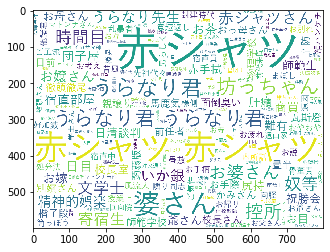

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(l)
#日本語のパスらしいです
fpath = "C:/Windows/Fonts/YuGothM.ttc"
wordcloud = WordCloud(background_color="white",#背景を白に
                     font_path=fpath,width = 800,height=600).generate(text)

plt.imshow(wordcloud)

#pngで保存する
wordcloud.to_file("bocchan.png")